# Практична робота № 8
### Тема. Жадібні алгоритми. Наближене розв’язання екстремальних зада
### Мета: набути практичних навичок застосування деяких жадібних алгоритмів для розв’язання екстремальних задач.

<h2 style="text-align: center;">Хід роботи</h2>

#### **Задачі для самостійного розв’язання**
Виконати індивідуальне завдання. Завдання полягає у розв’язанні єдиного завдання для всіх, вибравши граф згідно з варіантом. Номер варіанта відповідає номеру студента у списку групи. У разі, якщо було досягнуто кінця списку задач, потрібно циклічно повернутися на його початок.
Індивідуальне завдання.
1. Розв’язати задачу комівояжера для графа, заданого варіантом, використовуючи код, наведений вище.
2. Візуалізувати граф.

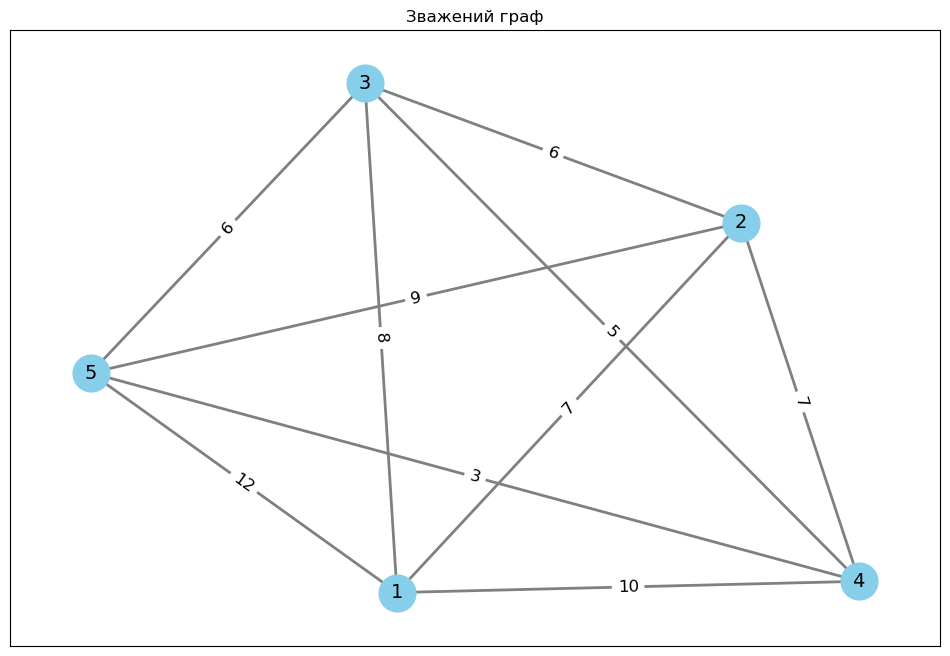

In [7]:
# Імпортуємо потрібні бібліотеки
import networkx as nx
import matplotlib.pyplot as plt

# Створюємо граф
G = nx.Graph()

# Додаємо вершини
G.add_nodes_from(range(1, 6))

# Додаємо ребра з вагами
edges = [
    (1, 2, 7), (1, 3, 8), (1, 4, 10), 
    (1, 5, 12), (2, 3, 6), (2, 4, 7), 
    (2, 5, 9), (3, 4, 5), (3, 5, 6), 
    (4, 5, 3)
]
G.add_weighted_edges_from(edges)

# Генеруємо позиції для відображення вершин
pos = nx.spring_layout(G)  # Функція для розташування вершин у гармонійному вигляді

# Візуалізація вузлів
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
nx.draw_networkx_labels(G, pos, font_size=14, font_family='sans-serif')

# Візуалізація ребер
nx.draw_networkx_edges(G, pos, edgelist=edges, width=2, edge_color='gray')

# Додавання підписів для ваг ребер
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

# Показуємо графік
plt.title("Зважений граф")
plt.show()


Маршрут, знайдений алгоритмом найближчого сусіда: [1, 2, 3, 4, 5, 1]


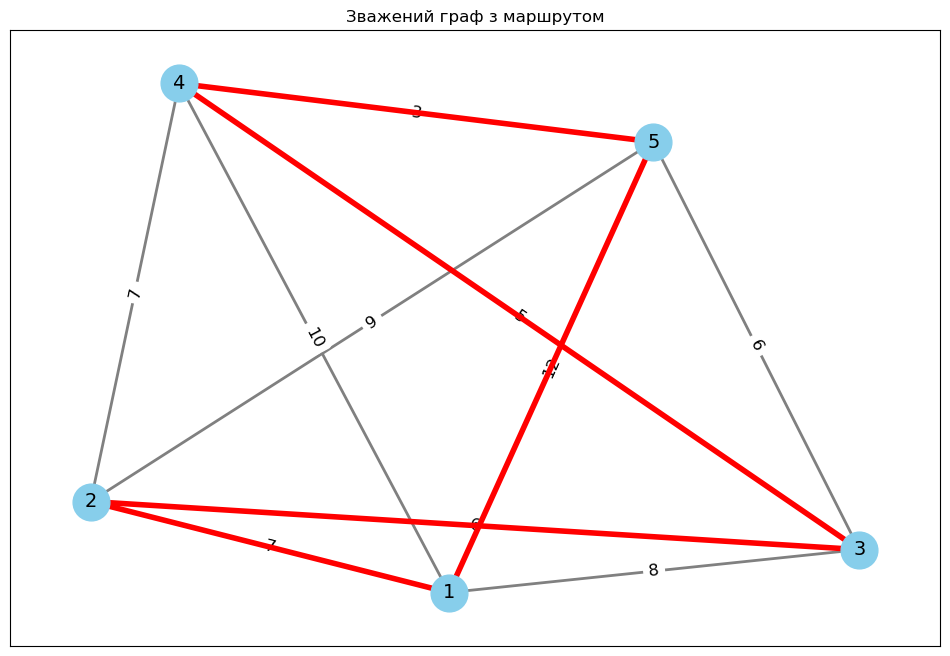

In [23]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Алгоритм найближчого сусіда для графа
def nearest_neighbor_algorithm_graph(G):
    nodes = list(G.nodes)
    N = len(nodes)
    visited = [False] * N
    tour = []
    
    # Вибираємо довільну точку
    current_node = np.random.choice(nodes)
    tour.append(current_node)
    visited[nodes.index(current_node)] = True
    
    for _ in range(1, N):
        previous_node = current_node
        min_distance = float('inf')
        
        # Шукаємо найближче непосещене сусіднє місто
        for neighbor in G.neighbors(previous_node):
            if not visited[nodes.index(neighbor)]:
                distance = G[previous_node][neighbor]['weight']
                if distance < min_distance:
                    min_distance = distance
                    current_node = neighbor
        
        tour.append(current_node)
        visited[nodes.index(current_node)] = True
    
    # Повертаємось в першу точку
    tour.append(tour[0])
    return tour

# Створення графа
G = nx.Graph()

# Додавання вершин та ребер
edges = [
    (1, 2, 7), (1, 3, 8), (1, 4, 10),
    (1, 5, 12), (2, 3, 6), (2, 4, 7),
    (2, 5, 9), (3, 4, 5), (3, 5, 6),
    (4, 5, 3)
]
G.add_weighted_edges_from(edges)

# Застосування алгоритму найближчого сусіда
tour = nearest_neighbor_algorithm_graph(G)
print("Маршрут, знайдений алгоритмом найближчого сусіда:", tour)

# Візуалізація графа
# Генеруємо позиції для відображення вершин
pos = nx.spring_layout(G)  # Функція для розташування вершин у гармонійному вигляді

# Візуалізація вузлів
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
nx.draw_networkx_labels(G, pos, font_size=14, font_family='sans-serif')

# Візуалізація ребер
nx.draw_networkx_edges(G, pos, edgelist=edges, width=2, edge_color='gray')

# Додавання підписів для ваг ребер
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

# Виділяємо маршрут
tour_edges = [(tour[i], tour[i+1]) for i in range(len(tour)-1)]
nx.draw_networkx_edges(G, pos, edgelist=tour_edges, width=4, edge_color='red')

# Показуємо графік
plt.title("Зважений граф з маршрутом")
plt.show()


3. Обґрунтувати асимптотику для обох алгоритмів

   Груба сила:

Асимптотична складність: O(n!)

Обґрунтування: Алгоритм грубої сили (перебір усіх можливих маршрутів) вирішує задачу комівояжера шляхом перебору всіх можливих перестановок точок. У задачі з 𝑛 точками, є 𝑛! (факториал) можливих перестановок для відвідування точок.
Для кожної перестановки обчислюється загальна відстань маршруту (сума ваг на ребрах).
Отже, алгоритм має складність O(n!), оскільки для кожної перестановки потрібно виконати перевірку, а число перестановок для n елементів зростає факторіально.

Алгоритм найближчого сусіда:

Асимптотична складність: $O(n^2logn)$

Обґрунтування:Алгоритм найближчого сусіда починається з вибору випадкової точки та повторює крок вибору найближчої точки, яка ще не була відвідана.
Для кожної точки 
Для кожної точки 
𝑖 (всього 𝑛 точок), алгоритм знаходить найменшу відстань до всіх ще не відвіданих точок. Це означає, що для кожної з 𝑛 точок потрібно виконати O(n) операцій пошуку найближчого сусіда.Всього це дасть складність $O(n^2)$ на пошук маршруту.
Оскільки кожен пошук найменшої відстані передбачає обчислення відстаней для всіх можливих точок, можна сказати, що кожен пошук займає 
O(n) операцій, а сам алгоритм виконується за $O(n^2)$.

Проте, якщо зберігати відстані між точками у вигляді матриці чи використовувати структури даних для ефективного пошуку, складність може знизитися до 
$O(n^2logn)$.

#### **Контрольні питання**

1. Що таке жадібний алгоритм?

 Жадібний алгоритм  — це алгоритм, який на кожному кроці вибирає найкраще можливе рішення, яке є на поточний момент, без врахування майбутніх кроків. Жадібні алгоритми працюють за принципом локальної оптимізації: на кожному етапі вибирається варіант, який здається найбільш вигідним на той момент, не намагаючись передбачити чи враховувати наслідки цього вибору для майбутніх кроків.

2. Які головні принципи роботи жадібних алгоритмів?

Основні принципи роботи жадібних алгоритмів:

Локальна оптимізація: на кожному етапі вибирається найкраще рішення, що доступне в поточний момент.
Жадібність: приймається рішення, яке здається найкращим на даний момент, без огляду на можливі наслідки для подальших етапів.
Не повертаються до попередніх рішень: після прийняття рішення жадібний алгоритм не змінює свій вибір.
Простота: часто жадібні алгоритми є простими і швидкими, оскільки вони не вимагають перебору всіх можливих варіантів.

3. Яка головна відмінність між жадібними алгоритмами та динамічним програмуванням?

Головна відмінність:

Жадібні алгоритми приймають рішення, яке здається оптимальним на поточному кроці, не враховуючи майбутні можливості, і не змінюють свої рішення на попередніх етапах.
Динамічне програмування (DP), на відміну від жадібних алгоритмів, часто передбачає обчислення всіх можливих підрішень для кожної підзадачі і зберігання їх для подальшого використання, щоб гарантувати глобальну оптимальність. У DP зазвичай розглядаються всі можливі варіанти, і рішення приймається з огляду на всю структуру задачі.

4. Наведіть приклади задач, які можна розв’язати за допомогою жадібних алгоритмів.

Задача про рюкзак (0/1 рюкзак) для обмежених ресурсів, коли вирішується, які предмети вибрати, щоб максимізувати загальну вартість при обмеженні за вагою.
Задача про мінімальне дерево покриття (наприклад, алгоритм Пріма або Краскала для побудови мінімального дерева покриття в графах).
Задача про задачу монетного обміну (коли треба мінімальною кількістю монет дати певну суму).
Задача про знаходження найкоротшого шляху в графі з позитивними вагами (наприклад, алгоритм Дейкстри для знаходження найкоротшого шляху).

5. Які можуть бути обмеження у використанні жадібних алгоритмів для розв'язання екстремальних задач?

Не завжди дають глобально оптимальне рішення: жадібний підхід може не гарантувати оптимальність для деяких задач, оскільки вибір локально найкращого варіанту не завжди веде до глобально оптимального рішення.
Залежність від структури задачі: жадібні алгоритми можуть бути ефективними лише для певних типів задач. Наприклад, не всі задачі, де є оптимальний підхід за принципом "жадібності", можуть бути вирішені таким чином. Існують задачі, де жадібний алгоритм дасть тільки наближене рішення.
Невідповідність для всіх задач: деякі задачі, такі як задача про рюкзак 0/1, не можуть бути ефективно вирішені за допомогою жадібних алгоритмів.

6. Чому жадібні алгоритми часто використовуються для наближеного розв’язання екстремальних задач?

Жадібні алгоритми часто використовуються для наближеного розв’язання екстремальних задач, оскільки:

Вони можуть давати швидкі рішення, навіть якщо ці рішення не є оптимальними, але достатньо хорошими для практичних застосувань.
Вони ефективні за часом, оскільки не потребують перебору всіх можливих варіантів, що характерно для жадібних методів.
У деяких випадках жадібні алгоритми можуть наближатися до оптимальних рішень, особливо в задачах, де локальна оптимізація призводить до глобальної оптимальності (як у задачах мінімального дерева покриття або в деяких задачах на графах).
Жадібні алгоритми дозволяють отримати приблизні рішення за менший час, що часто є достатнім для практичних цілей, коли точне оптимальне рішення важко або неможливо отримати в реальному часі.
